
# Remember, Remember, Don't Fly in December...
Author: **Keanu Richards and Ben Grant**

Run the cell below each time the notebook is started or restarted to ensure that if you change any code in the library, this notebook will use the latest version of the library code.

## Introduction:

You see plane crashes in movies and tv shows all the time. Due to high exposure to these dramatic scenes in movies and TV, many people around the world are terrified of flying.

**But how dangerous is flying?**

This is the question we sought to answer. We hope that our findings can alleviate the anxiety that many people face at the thought of riding in an airplane.

After acquiring and analyzing data from the entire history of aviation, we found that airplane crashes have proven to be incredibly rare, with recent trends indicating a one-in-a-million chance of any given flight ending in disaster. With aviation standards progressing every year, the safety of air travel has never been better.

### Movie Plane Crashes:

| ![](images/sully.jpg) | ![](images/knowing.jpg) |
|-----------------------|-------------------------|
| *Knowing* (2009)      | *Sully* (2016)          |

## Methodology

To acquire data of plane crash history we had to do a little research. With some digging, we found a [plane crash database](http://www.planecrashinfo.com/database.htm) with data from 5001 crashes spanning the entire history of aviation (1908 to 2021). The database tracks a myriad of different facts about each crash, but we will focus on the summary, date, and number of fatalities of each crash.

### Downloading the database

To ease our volume of requests from the database website, we first used a tool called wget which recursively traversed the website and downloaded all the pages that we would need to scrape data from.

### Scraping the Locally Stored Website

Since the data from the website was only accessible by navigating to various pages through links, we needed to build a site scraper that could visit each data page and scrape its data into a structure that would enable us to operate with the data using Python.

#### *Structure of the website:*
| ![](images/page_1.png) | ![](images/page_2.png) | ![](images/page_3.png) |
|------------------------|------------------------|------------------------|
| *Years Page*           | *Specific Year Page*   | *Crash Page*           |

Starting from the "years page," the scraper visits each "specific year page," then each "crash page." Once the scraper reaches a crash page it scrapes the crash listing's information from an HTML table by using the BeautifulSoup library to find and read data fields of interest. All of the data from each crash is written to a unique row in a CSV file. The CSV is initated with colunm labels before any crash data is written. Since the data pages of the website are visited in order by our scraper, the data is written to the CSV in chronological order (by crash date).

### Data Storage and Processing

The result of the scraping process is a large CSV file with 5001 rows of data from the database website, with each row made of 13 values that describe a particular crash.

The CSV file was easily converted to a Pandas dataframe which we used to access, manipulate, and visualize our data.

### Imports

The following libraries are included to help process our data:

In [1]:
import dateparser as dp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import collections
from datetime import datetime

# Setting parameters for PyPlot
plt.style.use("seaborn-dark-palette")
# plt.rcParams['figure.figsize'] = [12, 8]
# plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

## Accessing our Data

Since we wrote all of our data to a CSV file using our site scraping library, it can quickly be converted into a Pandas dataframe for easy access and manipulation:

In [2]:
data = pd.read_csv("all_data.csv")

### Timeline

When looking through the summaries for each crash listing in our data file, we picked out some notable crashes and their dates. They range from the first crash ever to the more recent Malaysia Flight 370.

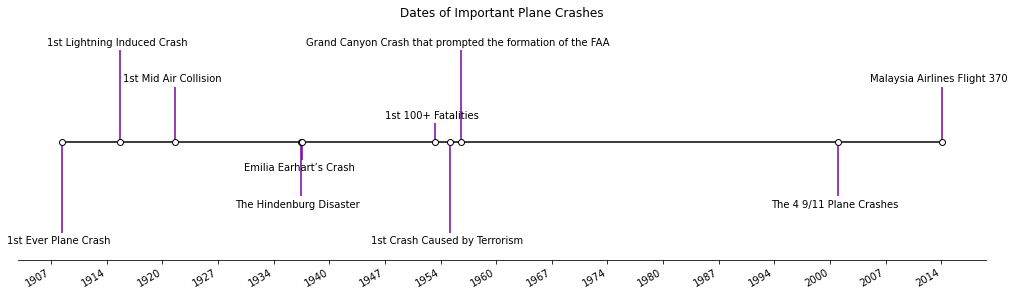

In [3]:
# Hard Code for Timeline:
names = ['1st Ever Plane Crash', '1st Lightning Induced Crash',
         'The Hindenburg Disaster',
         '1st Mid Air Collision', 'Emilia Earhart’s Crash',
         '1st 100+ Fatalities', '1st Crash Caused by Terrorism',
         'Grand Canyon Crash that prompted the formation of the FAA',
         'The 4 9/11 Plane Crashes', 'Malaysia Airlines Flight 370']
dates = ['1908-09-17', '1915-09-03', '1937-05-06', '1922-04-07', '1937-07-02', '1953-06-18',
         '1955-04-11', '1956-06-30', '2001-09-11', '2014-03-08']

dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

plt.style.use("seaborn-dark-palette")
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]


# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(14, 4), constrained_layout=True)
ax.set(title="Dates of Important Plane Crashes")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="center")

ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=80))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.15)
plt.show()

## How Frequent are Plane Crashes?

### Crashes by year over time

The first question we sought to answer was: **how many airplane crashes truly happen per year?**

We sorted the crashes in the database by year and counted how many crashes occurred in each year. This data is presented in a line graph below:

In [4]:
dates = data["Date:"]

crashes_by_year = {}

for date in dates:
    # if crashes_by_year

    # use date parser on date:
    year = dp.parse(date).year

    if year in crashes_by_year:
        crashes_by_year[year] += 1
    else:
        crashes_by_year[year] = 1

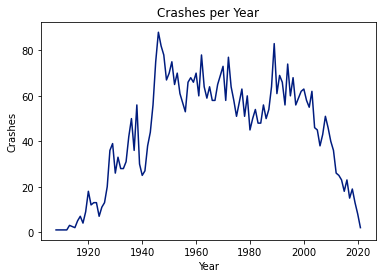

In [5]:
# line Graph
plt.style.use("seaborn-dark-palette")
plt.plot(crashes_by_year.keys(), crashes_by_year.values())

# Plot labeling
plt.title("Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Crashes")

plt.show()

The graph features multiple periods in which the number of crashes increases quite significantly. However, as of the year 2000, the number of crashes per year has seen a substantial decline.


The early spikes in the number of crashes can be attributed to a lack of aviation safety standards during the beginning years of flight. The Federal Aviation Administration (FAA), which is responsible for air traffic control and enforcement of safety standards, wasn’t founded until 1958.

Notice the rapid decline in crashes over the years of 2000-2020. This will be explored later on in the essay.

### Normalizing crashes from 2000 to 2020:

To provide a better sense of how much safer air travel has become in recent years, we wanted to look at the number of crashes each year versus that year's total number of flights. Since the number of total flights may differ from year to year, we need to incorporate this information along with how many crashes occur per year in order to find out how frequent plane crashes truly are.

**We concluded that the best expresssion to quantify the frequency of plane crashes for a given year is a ratio of crashes to total flights.**

Unfortunately, we had to look outside of our original database for the [information on total flights](https://www.transtats.bts.gov/TRAFFIC/), and the information that we did find only had data for flights that occurred between 2000 and 2020.

In [6]:
# flights from 2000 - 2020
flights_by_month = pd.read_csv("Air_Traffic.csv")

# dictionary to hold each flight year (keys) and the total number of flights that year (values)
flights_by_year = {}

for _, flight in flights_by_month.iterrows():
    # use date parser on date:
    year = dp.parse(flight["Period"]).year

    # build dictionary
    if year in flights_by_year:
        flights_by_year[year] += flight["Total"]
    else:
        flights_by_year[year] = flight["Total"]

# dataframe of all crashes from the crashes_by_year dictionary
crashes_by_year_all_time = pd.DataFrame(crashes_by_year.items(), columns = ["year", "crashes"])

# select crashes from years 2000 to 2020
crashes_00_20 = crashes_by_year_all_time.loc[crashes_by_year_all_time['year'].isin(range(2000, 2021))].reset_index(drop=True)

# build dataframe for flights from years 2000 to 2020
flights_00_20 = pd.DataFrame(flights_by_year.items(), columns = ["year", "flights"])

## build final dataframe:
flights_and_crashes = flights_00_20
flights_and_crashes["crashes"] = crashes_00_20["crashes"]

# normalize crashes by year
flights_and_crashes["normalized"] = [ row["crashes"]/row["flights"] for _, row in flights_00_20.iterrows()]

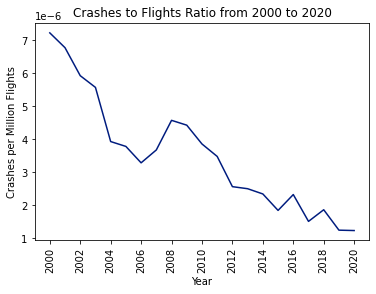

In [7]:
plt.style.use("seaborn-dark-palette")
plt.plot(flights_and_crashes["year"], flights_and_crashes["normalized"])

# Plot labeling
plt.title("Crashes to Flights Ratio from 2000 to 2020")
plt.ylabel("Crashes per Million Flights")
plt.xlabel("Year")
plt.xticks(range(2000, 2021, 2), rotation='vertical')

plt.show()

This graph provides a much better viewpoint on the safety improvements developed for aviation in just the past two decades.

When the crashes per year graph, looking at 2000-2020, is normalized to take into account the total number of flights per year you can see that **the chance of an airplane crashing in 2019** (yes, this was even a pre-COVID year) **was just a little over one in a million.** And when you look at the year 2000, **just 20 years prior the chance of an airplane crashing was nearly seven times higher.**

## Fatalities (total per year)

## How Many Fatalities per Year are Due to Plane Crashes?

### Air Crash Fatalities by Year Over Time

The second question we sought to answer was: **how many fatalities per year are due to plane crashes?**

We counted the number of fatalities associated with each crash in the database and summed these fatalities for each year of data. This data is presented in a line graph below:

In [8]:
fatalities = data[["Date:","Fatalities:"]]

fatalities_by_year = {}

for _, row in fatalities.iterrows():
    # split the Fatalities String at the integer representing total deaths
    deaths = row["Fatalities:"].split(" ", 1)[0]
    
    if deaths == "?":
        deaths = 0
    else:
        deaths = int(deaths)

    year = dp.parse(row["Date:"]).year

    if year in fatalities_by_year:
        fatalities_by_year[year] += deaths
    else: 
        fatalities_by_year[year] = deaths

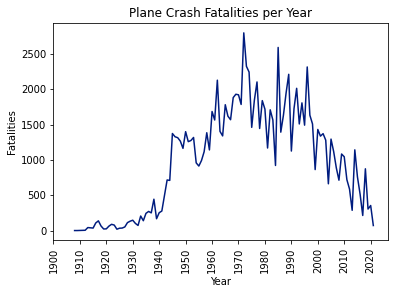

In [9]:
plt.style.use("seaborn-dark-palette")
plt.plot(fatalities_by_year.keys(), fatalities_by_year.values())

# Plot labeling
plt.title("Plane Crash Fatalities per Year")
plt.ylabel("Fatalities")
plt.xlabel("Year")
plt.xticks(range(1900, 2021, 10), rotation='vertical')

plt.show()

To put this in context, **the average number of car accident fatalities per year is 1.35 million** ([CDC Source](https://www.cdc.gov/injury/features/global-road-safety/index.html#:~:text=Each%20year%2C%201.35%20million%20people,on%20roadways%20around%20the%20world.&text=Every%20day%2C%20almost%203%2C700%20people,pedestrians%2C%20motorcyclists%2C%20or%20cyclists.)).

The fatalities per year graph bears a high resemblance to the crashes per year graph. It features multiple periods where fatalities spike up or down, but again, the general trend from the years following 2000 is a steady downward trend.

Despite the increase in frequency and capacity of flights from the years 2000-2020, the air-crash fatalities of these years are lower than they have ever been in post-WWII history, which indicates that the industry has been making great strides in safety.

### Volume Comparison

To visualize the immense difference in the volume of flights that occur without issue and the volume of flights that result in crashes, we have compared the number of flights in relatively busy month of air travel (July 2004) to the total number of crashes listed in the database:

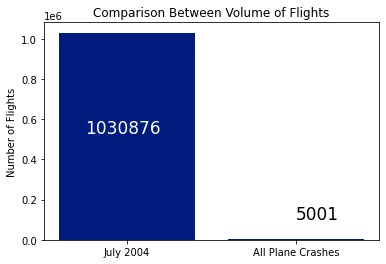

In [18]:
jul_04_total = flights_by_month.loc[flights_by_month['Period'] == "July 2004"].values[0][1]

crashes_total = sum(crashes_by_year.values())

plt.style.use("seaborn-dark-palette")
plt.bar(["July 2004", "All Plane Crashes"], [jul_04_total, crashes_total])

# Plot labeling
plt.title("Comparison Between Volume of Flights")
plt.ylabel("Number of Flights")
plt.text(-.25 , jul_04_total - 500000 , s=f"{jul_04_total}" , fontdict=dict(fontsize=17, color="white"))
plt.text(1 , crashes_total + 100000 , s=f"{crashes_total}" , fontdict=dict(fontsize=17))

plt.show()

Without context, 5001 plane crashes may seem like a scary number. However, **in comparison to the huge volume of safely executed flights that happen on a regular basis, you can begin to realize just how rare air-crashes are.**

## Conclusion

Plane crashes seem much more frequent than they actually are. They look spectacular on the screen, so in the process of dazzling their viewers film makers have tricked us into thinking that every flight is a disaster witing to happen.

In reality, planes are pretty safe. 

### Airplane Safety Advancements

People often learn a lot from their mistakes and failures—this is very accurate when it comes to the history of aviation. Unfortunately, mistakes in aviation are much higher stakes and carry life or death consequences.

The numerous advancements that have been made in aviation safety are often developed from the insight and knowledge acquired from previous accidents.

For instance, a Crash between TWA Flight 2 and United Airlines Flight 718 in 1956, which occurred over the Grand Canyon, led to the formation of the FAA and upgrades to air traffic control systems. It would take 47 years for the U.S. to experience its next mid-air collision.

United Airlines Flight 173 crash-landed in a suburb of Portland Oregon, killing 10 people. This crash led to reforms in Cockpit Resource Management, and probably its most important improvement was the abandonment of the traditional airline hierarchy that bred arrogance in airline captains.

The crash of Air Canada’s Flight 797, in 1983 led to a mandate that all subsequent planes be equipped with smoke detectors and automatic fire extinguishers. All planes created after 1988 have been manufactured with more fire-resistant material on the inside walls of their fuselages.

Delta Flight 191 crashed in 1985 as a result of a strong downdraft that caused the aircraft to lose 54 knots of airspeed and endure a rough landing that claimed the lives of 135 people and damaged a highway as well as its own airport. This crash prompted a seven-year research effort that made onboard forward-looking radar wind-shear detectors a common feature on airliners. 

United Airlines Flight 232 experienced engine failure that rendered the plane uncontrollable. The crash that resulted claimed the lives of 110 passengers and led to various engine safety improvements. The FAA ordered modifications to the aircraft model’s hydraulic systems and changed the way engineer inspections were performed. 
Aloha Flight 243 experienced the unthinkable when a large portion of the aircraft’s tin fuselage blew off sweeping out a flight attendant and leaving many of its passengers riding out in the open. The flight attendant was the only casualty. This incident prompted the National Aging Aircraft Research Program in 1991 to eliminate the use of tin and tighten maintenance requirements.

The infamous Malaysia Flight 370, one of aviation's biggest mysteries. Its unexplained disappearance has led the International Civil Aviation Organization to order all airlines to install properly up-to-date tracking equipment on all aircraft. 

The various crashes throughout the history of aviation have led to real advancement and change to better ensure the safety of airplane passengers. Whether it’s been material upgrades, systems inspections, or just better training of pilots and crew, all have gone a long way in maintaining the downward trend seen in both the crashes and fatalities of the 21st century.

### If You Still Aren't Convinced that Airplanes are Safe...

If our data analysis was not compelling to you, and you somehow are still afraid to fly, we have some information for you.

We plotted the number of crashes for each calendar month that have occurred throughout aviation history:

In [13]:
# dictionary to hold each month (keys) and the total number of crashes in that month (values)
crashes_by_month = {}

for date in dates:
    # use date parser on date:
    month = dp.parse(date).month

    # build dictionary
    if month in crashes_by_month:
        crashes_by_month[month] += 1
    else:
        crashes_by_month[month] = 1

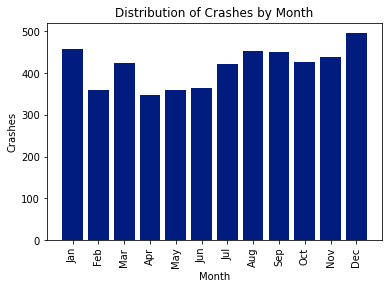

In [14]:
# Had to convert to an ordered dictionary to get the month labels to work correctly
od = collections.OrderedDict(sorted(crashes_by_month.items()))

# Month labels
labels = ['Jan', 'Feb', 'Mar', 'Apr', "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(list(od.keys()), labels, rotation='vertical')

# Bar graph of data
plt.style.use("seaborn-dark-palette")
plt.bar(od.keys(), od.values())

# Plot labeling

plt.title("Distribution of Crashes by Month")
plt.xlabel("Month")
plt.ylabel("Crashes")

plt.show()

The **month of December is pretty convincingly the worst month to fly** whereas the month of **April is the safest.**